<table><tr>
<td> <img src="https://projects.insaid.co/capstone2/hr.png" alt="Drawing" style="width: 750px;"/> </td>
<td> <img src="https://projects.insaid.co/capstone2/companylogo.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

<h1><center>
HR tries to stop Employee Churn
</center></h1>

# Project Description

## Your client for this project is the HR Department at a software company.

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

## Current Practice

Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

## This suffers from the following problems:

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

# Consulting Goals

## Your Role

- You are given datasets of past employees and their status (still employed or already left).
- Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.

## Problem Specifics
Deliverable: <b> Predict whether an employee will stay or leave. </b> <br>
Machine learning task: <b> Classification </b> <br>
Target variable: <b> Status (Employed/Left) </b> <br>
Win condition: <b> N/A (best possible model)

# Data Description

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. <b> department_data </b> <br>
This dataset contains information about each department. The schema of the dataset is as follows:

    - dept_id – Unique Department Code
    - dept_name – Name of the Department
    - dept_head – Name of the Head of the Department

<br>
2. <b> employee_details_data </b> <br>
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

    - employee_id – Unique ID Number for each employee
    - age – Age of the employee
    - gender – Gender of the employee
    - marital_status – Marital Status of the employee
<br>
3. <b> employee_data </b> <br>
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status. <br>

<b> Target variable </b>

        - status – Current employment status (Employed / Left)

<b> Administrative information</b>

    - department – Department to which the employees belong(ed) to
    - salary – Salary level with respect to rest of their department
    - tenure – Number of years at the company
    - recently_promoted – Was the employee promoted in the last 3 years?
    - employee_id – Unique ID Number for each employee

<b> Workload information </b>

    - n_projects – Number of projects employee has worked on
    - avg_monthly_hrs – Average number of hours worked per month

<b> Mutual evaluation information </b>

    - satisfaction – Score for employee’s satisfaction with the company (higher is better)
    - last_evaluation – Score for most recent evaluation of employee (higher is better)
    - filed_complaint – Has the employee filed a formal complaint in the last 3 years?

<h1><center>
Module A: Getting Data from sql server
</center></h1>
(Codes contributed for data aquire by Sushil Thakur, P K Muralidharan)

In [ ]:
#!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
#!pip install -q --upgrade pandas-profiling

In [ ]:
#importing packages needed for data retrieval and basic data vieweing

# For Panel Data Analysis
import pandas as pd
#import pandas_profiling
#from pandas_profiling import ProfileReport
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np


# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix


# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

# For Data Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install mysql.connector

In [ ]:
# Getting data from sql server using Python-SQL connector. 
# A nice peice of code by P. Muraldharan factoring in code errors (if there are any)

import mysql.connector

from mysql.connector import errorcode
try:
 cnx = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone2')
 df_department_data = pd.read_sql_query('select * from department_data', con=cnx)

 df_employee_details_data = pd.read_sql_query('select * from employee_details_data', con=cnx)
 
 df_employee_data = pd.read_sql_query('select * from employee_data', con=cnx)
 
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
 cnx.close()

<h1><center>
Module B: Take long looks at the 3 data sets
</center></h1>
(By Manish Gupta, Susmita Chakravorty, P K Muralidharan, Shraddha Rokade & others)

<br>

# Lets look at data set no. 1: data - department_data


In [ ]:
# Lets look at 1st data - department_data

print(df_department_data.head())
print(df_department_data.info())

   dept_id    dept_name              dept_head
0   D00-IT           IT             Henry Adey
1   D00-SS        Sales        Edward J Bayley
2   D00-TP         Temp        Micheal Zachrey
3  D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP      Support         Amelia Westray
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes
None


# Notes on data set no. 1: department_data

I see that this df has only **11 rows** - so I want to check **if all departments have just one unique head for the entire period that data was collected**. Possible, manually.

The info says that no problem to be expected for data.

In [ ]:
df_department_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


# Notes on data set no. 1: departmet_data

**Indeed, no overlap of department heads** 

<br>

<br>

# Lets now look at data set no. 2: employee_details_data
which has their personal information


In [ ]:
#Lets now look at the 2nd data set - employee_details_data - which has their personal information

print(df_employee_details_data.head())
print(df_employee_details_data.info())

   employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB
None


# Notes on data set no. 2: employee_details_data

**14245** employee's data.
No missing data.

Lets check among the object type data, if the entries are alright

In [ ]:
print("There are only {} values for 'gender' and they are {}".format(df_employee_details_data['gender'].nunique(), df_employee_details_data['gender'].unique()))

There are only 2 values for 'gender' and they are ['Male' 'Female']


In [ ]:
print("There are only {} values for 'gender' and they are {}".format(df_employee_details_data['marital_status'].nunique(), df_employee_details_data['marital_status'].unique()))

There are only 2 values for 'gender' and they are ['Married' 'Unmarried']


# Notes on data set no. 2: employee_details_data

Lets check for duplication **with emphasis on 'employee_id'** because this is the variable that will be matched between data sets 2 & 3 to merge data sets.

In [ ]:
print(df_employee_details_data['employee_id'].isna().sum())
print(df_employee_details_data['employee_id'][df_employee_details_data['employee_id'] < 1e5].value_counts().sum())
print(df_employee_details_data['employee_id'][df_employee_details_data['employee_id'] > 1e5].value_counts().sum())

0
0
14245


In [ ]:
duplicate_dataset2 = df_employee_details_data.duplicated()
duplicate_dataset2.unique()

array([False])

In [ ]:
duplicate_dataset2 = df_employee_details_data.duplicated('employee_id')
duplicate_dataset2.unique()

array([False])

# Notes on data set no. 2: employee_details_data

So, the above 3 cells of code show that data set no. 2 employee_details_data
- does not have any duplicate rows
- for the variable 'employee_id' there are no Null values, 0 value, or a value that is less than 6 digits, or not an integer. So this variable has **no fault** in this data set.

Lets check data set no. 3 employee_data for 'faults' in the variable 'employee_id'

<br>

# Lets now look at data set no. 3: employee_data
which has their professional information with the said company


In [ ]:
# Lets now look at data set no. 3: employee_data - which has their professional information with the said company 

print(df_employee_data.head())
print(df_employee_data.info())

   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.405101   Left     3.0       126150  
3                NaN     low      0.152974   Left     4.0       125346  
4                NaN  medium      0.434845   Left     3.0       113707  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data column

# Notes on data set no. 3: employee_data

This data set **needs working**

- Question for client: why are there lesser data **14150** compared to data set no.2?? More personal data than professional data?

<br>

Lets start cleanning this data set with 'employee_id' because this is the variable that will be used to merge data sets 2 and 3. <br>
This variable has no missing values. But there are **14150** employee ids here as compared to **14245** (none of these 14245 are null, 0 or duplicate!!) 

In [ ]:
print(df_employee_data['employee_id'].isna().sum())
print(df_employee_data['employee_id'][df_employee_data['employee_id'] < 1e5].value_counts().sum())
print(df_employee_data['employee_id'][df_employee_data['employee_id'] > 1e5].value_counts().sum())

0
5
14145


# Notes on data set no. 3: employee_data


So there are 5 problematic values of 'employee_id' in this data set - 5 with employee_id zero. Since these 5 cannot be matched with any data from data set no. 2, and its just 5 out of 14150, so we can drop these rows. <br>

The data set no. 3 will change henceforth. **Hence lets make a copy, to retain the original.**

In [ ]:
df_employee_data_corrected = df_employee_data.copy()

In [ ]:
df_employee_data_corrected.drop(df_employee_data_corrected[df_employee_data_corrected['employee_id'] == 0].index, inplace=True)
print(df_employee_data_corrected['employee_id'][df_employee_data_corrected['employee_id'] < 1e5].value_counts().sum())

0


In [ ]:
df_employee_data_corrected.count()

avg_monthly_hrs      14145
department           13439
filed_complaint       2046
last_evaluation      12658
n_projects           14145
recently_promoted      297
salary               14145
satisfaction         13995
status               14145
tenure               13995
employee_id          14145
dtype: int64

In [ ]:
print("The number of duplicate rows based on 'employee_id' is:", df_employee_data_corrected.duplicated(subset='employee_id').sum())

The number of duplicate rows based on 'employee_id' is: 29


In [ ]:
df_employee_data_corrected.drop_duplicates(subset='employee_id', keep='first', inplace=True)
df_employee_data_corrected.count()

avg_monthly_hrs      14116
department           13410
filed_complaint       2041
last_evaluation      12629
n_projects           14116
recently_promoted      297
salary               14116
satisfaction         13966
status               14116
tenure               13966
employee_id          14116
dtype: int64

# Notes on data set no. 3: employee_data_corrected

Lets start with the object type data sets: lets start with the **least problematic ones - salary & status** which have 14150 data (**no** missing data) 

In [ ]:
print("There are {} types of entry for 'salary' and they are {}:".format(df_employee_data_corrected['salary'].nunique(), df_employee_data['salary'].unique()))

print()

print("There are {} types of entry for the Target Variable 'status' and they are {}:".format(df_employee_data_corrected['status'].nunique(), df_employee_data['status'].unique()))

There are 3 types of entry for 'salary' and they are ['medium' 'low' 'high']:

There are 2 types of entry for the Target Variable 'status' and they are ['Left' 'Employed']:


# Notes on data set no. 3: employee_data_corrected

**'salary'** indeed is **clean** with 3 types of entries: 'medium' 'low' 'high'
<br>
**Target Variable 'status'** is also **clean** (Whew!) with 2 types of entries: 'Left' & 'Employed'

<br>

Next, we should check out the only other object type variable - "department" 

In [ ]:
print("No of listed departments in the employee data base is:", df_employee_data_corrected['department'].nunique())
print("The departments are:", df_employee_data_corrected['department'].unique())

print("")

print("Note that the no. of departments in data set no. 1 - department_data is:", df_department_data['dept_id'].nunique())
print("The departments are:", df_department_data['dept_id'].unique())

No of listed departments in the employee data base is: 12
The departments are: [None 'D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN'
 'D00-ENG' 'D00-PR' 'D00-TP' 'D00-FN' '-IT']

Note that the no. of departments in data set no. 1 - department_data is: 11
The departments are: ['D00-IT' 'D00-SS' 'D00-TP' 'D00-ENG' 'D00-SP' 'D00-FN' 'D00-PR' 'D00-AD'
 'D00-MN' 'D00-MT' 'D00-PD']


# Notes on data set no. 3: employee_data_corrected

Two issues here:  <br>
1. So, "None" is just Null values? Lets verify <br>
2. Whats up with the entry '-IT'? Lets check it out thoroughly. Data set no. 1 - department_data had 11 departments and in data set no. 3 - employee_data we have 12 departments. <br>

*The extra/uncommon one is '-IT'*

In [ ]:
print('df_employee_data_corrected["department"].isna().sum() = ', df_employee_data_corrected["department"].isna().sum())

print('df_employee_data_corrected["avg_monthly_hrs"].count() = ', df_employee_data_corrected["avg_monthly_hrs"].count())

print('df_employee_data_corrected["avg_monthly_hrs"].count() = ', df_employee_data_corrected["department"].count())

print('The difference is = ', (df_employee_data_corrected["avg_monthly_hrs"].count() - df_employee_data_corrected["department"].count()))

print()
print('So confirmed that "None" is Null values')

df_employee_data_corrected["department"].isna().sum() =  706
df_employee_data_corrected["avg_monthly_hrs"].count() =  14116
df_employee_data_corrected["avg_monthly_hrs"].count() =  13410
The difference is =  706

So confirmed that "None" is Null values


In [ ]:
print("df_employee_data_corrected[df_employee_data_corrected['department'] == 'D00-IT']['department'].count() =", df_employee_data_corrected[df_employee_data_corrected['department'] == 'D00-IT']['department'].count())
print("df_employee_data_corrected[df_employee_data_corrected['department'] == '-IT']['department'].count() =", df_employee_data_corrected[df_employee_data_corrected['department'] == '-IT']['department'].count())

df_employee_data_corrected[df_employee_data_corrected['department'] == 'D00-IT']['department'].count() = 1152
df_employee_data_corrected[df_employee_data_corrected['department'] == '-IT']['department'].count() = 207


# Notes on data set no. 3: employee_data_corrected

We need to perform the following actions for the department

- Question for client: 'department' == None means what? Is it a non-permanant employee or no data? Since we cannot ask them, here we assume two approaches <br>
    -(a) 'department' == null is equal to non-permanant employee. Hence, we drop them. (Approach used by Susmita Chakravorty and Manish Gupta) <br>
    -(b) 'department' == null rows share average properties of all other variables. So we keep them as a seperatly names department - 'D00-Any' (Approach used by P K Muralidharan and Shraddha Rokade) <br>
    -data set (a) will be the default going forward, but we shall compare results with data set (b) at nodal points.
- Then we convert all '-IT' to 'D00-IT'

In [ ]:
DF2 = df_employee_data_corrected.copy()
DF2['department']=DF2['department'].fillna('D00-Any')
DF2[DF2['department']=='D00-Any']['department'].count()

706

In [ ]:
DF2.count()

avg_monthly_hrs      14116
department           14116
filed_complaint       2041
last_evaluation      12629
n_projects           14116
recently_promoted      297
salary               14116
satisfaction         13966
status               14116
tenure               13966
employee_id          14116
dtype: int64

In [ ]:
df_employee_data_corrected.dropna(axis=0, subset=('department',), inplace=True)
df_employee_data_corrected.count()

avg_monthly_hrs      13410
department           13410
filed_complaint       1955
last_evaluation      11989
n_projects           13410
recently_promoted      282
salary               13410
satisfaction         13260
status               13410
tenure               13260
employee_id          13410
dtype: int64

In [ ]:
df_employee_data_corrected.loc[df_employee_data_corrected['department'] == '-IT', 'department'] = 'D00-IT'
DF2.loc[DF2['department'] == '-IT', 'department'] = 'D00-IT'

In [ ]:
print("No of listed departments in the employee data base is:", df_employee_data_corrected['department'].nunique())
print("The departments are:", df_employee_data_corrected['department'].unique())

No of listed departments in the employee data base is: 11
The departments are: ['D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN' 'D00-ENG'
 'D00-PR' 'D00-TP' 'D00-FN']


In [ ]:
print("No of listed departments in the employee data base is:", DF2['department'].nunique())
print("The departments are:", DF2['department'].unique())

No of listed departments in the employee data base is: 12
The departments are: ['D00-Any' 'D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN'
 'D00-ENG' 'D00-PR' 'D00-TP' 'D00-FN']


# Notes on data set no. 3: employee_data_corrected

**All problems with department column solved**

<br>

**Now lets concentrate on the numeric data** 

<br>

'filed_complaint' and 'recently_promoted' are listed as float64, but should be object

In [ ]:
df_employee_data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 2 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    1955 non-null   float64
 3   last_evaluation    11989 non-null  float64
 4   n_projects         13410 non-null  int64  
 5   recently_promoted  282 non-null    float64
 6   salary             13410 non-null  object 
 7   satisfaction       13260 non-null  float64
 8   status             13410 non-null  object 
 9   tenure             13260 non-null  float64
 10  employee_id        13410 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
df_employee_data_corrected['filed_complaint'].unique()

array([ 1., nan])

In [ ]:
df_employee_data_corrected['recently_promoted'].unique()

array([nan,  1.])

# Notes on data set no. 3: employee_data_corrected

For both 'filed_complaint' and 'recently_promoted' we do the following steps
- For the two variables, change nan to 0
- Change the variable type to object

In [ ]:
df_employee_data_corrected['filed_complaint']=df_employee_data_corrected['filed_complaint'].fillna(0)

df_employee_data_corrected['filed_complaint'] = df_employee_data_corrected['filed_complaint'].astype(int)
df_employee_data_corrected['filed_complaint'] = df_employee_data_corrected['filed_complaint'].astype(str)


DF2['filed_complaint']=DF2['filed_complaint'].fillna(0)

DF2['filed_complaint'] = DF2['filed_complaint'].astype(int)
DF2['filed_complaint'] = DF2['filed_complaint'].astype(str)


In [ ]:
df_employee_data_corrected['filed_complaint'].unique()

array(['1', '0'], dtype=object)

In [ ]:
df_employee_data_corrected['recently_promoted']=df_employee_data_corrected['recently_promoted'].fillna(0)

df_employee_data_corrected['recently_promoted'] = df_employee_data_corrected['recently_promoted'].astype(int)
df_employee_data_corrected['recently_promoted'] = df_employee_data_corrected['recently_promoted'].astype(str)


DF2['recently_promoted']=DF2['recently_promoted'].fillna(0)

DF2['recently_promoted'] = DF2['recently_promoted'].astype(int)
DF2['recently_promoted'] = DF2['recently_promoted'].astype(str)


In [ ]:
df_employee_data_corrected['recently_promoted'].unique()

array(['0', '1'], dtype=object)

In [ ]:
df_employee_data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 2 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    13410 non-null  object 
 3   last_evaluation    11989 non-null  float64
 4   n_projects         13410 non-null  int64  
 5   recently_promoted  13410 non-null  object 
 6   salary             13410 non-null  object 
 7   satisfaction       13260 non-null  float64
 8   status             13410 non-null  object 
 9   tenure             13260 non-null  float64
 10  employee_id        13410 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  object 
 3   last_evaluation    12629 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  object 
 6   salary             14116 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        14116 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


# Notes on data set no. 3: employee_data_corrected

Lets now deal with the next 2 numeric columns with missing values - 'satisfaction' and 'tenure' - because they have the same number of data missing.

In [ ]:
df_employee_data_corrected.dropna(axis=0, subset=('tenure',)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13260 entries, 2 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13260 non-null  float64
 1   department         13260 non-null  object 
 2   filed_complaint    13260 non-null  object 
 3   last_evaluation    11989 non-null  float64
 4   n_projects         13260 non-null  int64  
 5   recently_promoted  13260 non-null  object 
 6   salary             13260 non-null  object 
 7   satisfaction       13260 non-null  float64
 8   status             13260 non-null  object 
 9   tenure             13260 non-null  float64
 10  employee_id        13260 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


# Notes on data set no. 3: employee_data_corrected


The above cell code tells us that - <br>
**Its the SAME rows (data entries) which have missing values in both the variables - 'satisfaction' and 'tenure'** <br>
We **can impute the missing values** with the mean or median, at a later stage - after joining data sets 1, 2 and 3 together. Or, **should we just drop these rows?** Team decide.

<br>

The last variable that needs thought is 'last_evaluation'

In [ ]:
df_employee_data_corrected.dropna(axis=0, subset=('last_evaluation',)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11989 entries, 2 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    11989 non-null  float64
 1   department         11989 non-null  object 
 2   filed_complaint    11989 non-null  object 
 3   last_evaluation    11989 non-null  float64
 4   n_projects         11989 non-null  int64  
 5   recently_promoted  11989 non-null  object 
 6   salary             11989 non-null  object 
 7   satisfaction       11989 non-null  float64
 8   status             11989 non-null  object 
 9   tenure             11989 non-null  float64
 10  employee_id        11989 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


# Notes on data set no. 3: employee_data_corrected


The code in the above cell tells us that the rows which have null values for 'satisfaction' and 'tenure' are a subset of the rows which have null values for 'last_evaluation' <br>

We **can impute the missing values** with the mean or median, at a later stage - after joining data sets 1, 2 and 3 together. Or, **should we just drop these rows?** If we drop the rows here, we get **11989** data sets as opposed to **13410**. A **~10.5% reduction** in data. So team decide - imputation or drop. 


<h1><center>
Module C: Joining Data Sets - make master data set <br>
    Prepare set for EDA
</center></h1>

In [ ]:
DF1 = pd.merge(left=df_employee_data_corrected, right=df_employee_details_data, on='employee_id')
DF1.info()

DF2 = pd.merge(left=DF2, right=df_employee_details_data, on='employee_id')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 0 to 13409
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    13410 non-null  object 
 3   last_evaluation    11989 non-null  float64
 4   n_projects         13410 non-null  int64  
 5   recently_promoted  13410 non-null  object 
 6   salary             13410 non-null  object 
 7   satisfaction       13260 non-null  float64
 8   status             13410 non-null  object 
 9   tenure             13260 non-null  float64
 10  employee_id        13410 non-null  int64  
 11  age                13410 non-null  int64  
 12  gender             13410 non-null  object 
 13  marital_status     13410 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.5+ MB


In [ ]:
DF1.isna().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1421
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
age                     0
gender                  0
marital_status          0
dtype: int64

# Notes on Master Data Set DF1

Lets impute values for 'last_evaluation', 'satisfaction' and 'tenure'

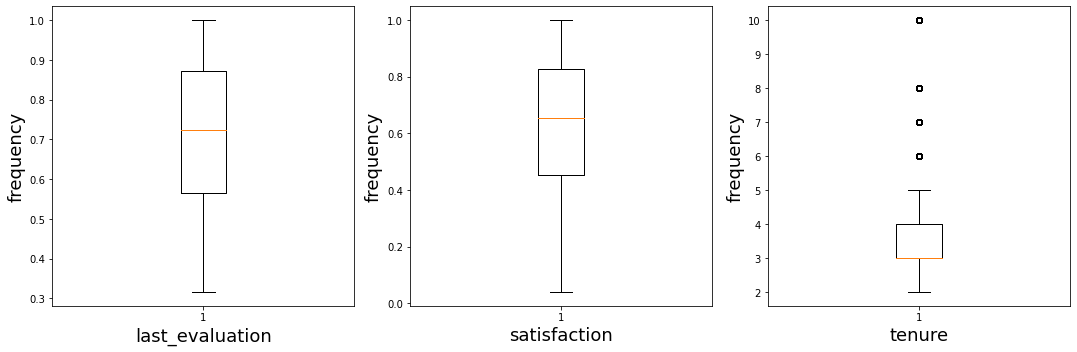

In [ ]:
# This code is contributed by from Manish Gupta

def plot_boxplots(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.boxplot(X)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_boxplots(DF1[['last_evaluation', 'satisfaction', 'tenure']])

In [ ]:
DF1.describe()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,employee_id,age
count,13410.000000,11989.000000,13410.000000,13260.000000,13260.000000,13410.000000,13410.000000
mean,200.045116,0.718356,3.783296,0.622210,3.504525,112115.618121,32.931916
std,50.843304,0.172980,1.250200,0.250448,1.473417,8495.025538,9.976043
min,49.000000,0.316175,1.000000,0.040058,2.000000,100101.000000,22.000000
25%,155.000000,0.564202,3.000000,0.451453,3.000000,105783.250000,24.000000
50%,199.000000,0.723653,4.000000,0.654061,3.000000,111297.000000,29.000000
75%,245.000000,0.871407,5.000000,0.825611,4.000000,116652.500000,41.000000
max,310.000000,1.000000,7.000000,1.000000,10.000000,148988.000000,57.000000


In [ ]:
# Code contributed by P K Muralidharan

DF1['tenure'] = DF1['tenure'].fillna(DF1['tenure'].median())
DF1['satisfaction'] = DF1['satisfaction'].fillna(DF1['satisfaction'].median())
DF1['last_evaluation'] = DF1['last_evaluation'].fillna(DF1['last_evaluation'].median())

DF1.describe()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,employee_id,age
count,13410.000000,13410.000000,13410.000000,13410.000000,13410.000000,13410.000000,13410.000000
mean,200.045116,0.718918,3.783296,0.622567,3.498881,112115.618121,32.931916
std,50.843304,0.163566,1.250200,0.249065,1.466113,8495.025538,9.976043
min,49.000000,0.316175,1.000000,0.040058,2.000000,100101.000000,22.000000
25%,155.000000,0.579716,3.000000,0.454643,3.000000,105783.250000,24.000000
50%,199.000000,0.723653,4.000000,0.654061,3.000000,111297.000000,29.000000
75%,245.000000,0.856512,5.000000,0.823886,4.000000,116652.500000,41.000000
max,310.000000,1.000000,7.000000,1.000000,10.000000,148988.000000,57.000000


In [ ]:
# This code is contributed by Manish Gupta

DF1 = pd.merge(left=df_employee_data_corrected, right=df_employee_details_data, on='employee_id')

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
raw_num = knn_imputer.fit_transform(DF1[['last_evaluation', 'satisfaction', 'tenure']])
raw_frame = pd.DataFrame(data = raw_num, columns = ['last_evaluation', 'satisfaction', 'tenure'])

DF1['last_evaluation'] = raw_frame['last_evaluation']
DF1['satisfaction'] = raw_frame['satisfaction']
DF1['tenure'] = raw_frame['tenure']

DF1.describe()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,employee_id,age
count,13410.000000,13410.000000,13410.000000,13410.000000,13410.000000,13410.000000,13410.000000
mean,200.045116,0.715004,3.783296,0.622210,3.504525,112115.618121,32.931916
std,50.843304,0.166546,1.250200,0.249043,1.465153,8495.025538,9.976043
min,49.000000,0.316175,1.000000,0.040058,2.000000,100101.000000,22.000000
25%,155.000000,0.570348,3.000000,0.454643,3.000000,105783.250000,24.000000
50%,199.000000,0.718356,4.000000,0.649845,3.000000,111297.000000,29.000000
75%,245.000000,0.857377,5.000000,0.823886,4.000000,116652.500000,41.000000
max,310.000000,1.000000,7.000000,1.000000,10.000000,148988.000000,57.000000


# Notes on Master Data Set: data imputation

- I checked the distribution of 'last_evaluation', 'satisfaction', 'tenure'
- I imputed using the simplest 'median imputation' and then 'knn_imputation'
- This data is not complicated - hence median imputation gave same result as the knn_imputation. <br> Hence I choose the simpler method of **median-imputation** and go forward. 

In [ ]:
DF1 = pd.merge(left=df_employee_data_corrected, right=df_employee_details_data, on='employee_id')

In [ ]:
DF1['tenure'] = DF1['tenure'].fillna(DF1['tenure'].median())
DF1['satisfaction'] = DF1['satisfaction'].fillna(DF1['satisfaction'].median())
DF1['last_evaluation'] = DF1['last_evaluation'].fillna(DF1['last_evaluation'].median())

DF1.info()


# Same treatment performed on DF2

DF2['tenure'] = DF2['tenure'].fillna(DF2['tenure'].median())
DF2['satisfaction'] = DF2['satisfaction'].fillna(DF2['satisfaction'].median())
DF2['last_evaluation'] = DF2['last_evaluation'].fillna(DF2['last_evaluation'].median())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 0 to 13409
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    13410 non-null  object 
 3   last_evaluation    13410 non-null  float64
 4   n_projects         13410 non-null  int64  
 5   recently_promoted  13410 non-null  object 
 6   salary             13410 non-null  object 
 7   satisfaction       13410 non-null  float64
 8   status             13410 non-null  object 
 9   tenure             13410 non-null  float64
 10  employee_id        13410 non-null  int64  
 11  age                13410 non-null  int64  
 12  gender             13410 non-null  object 
 13  marital_status     13410 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.5+ MB


In [ ]:
#DF1[DF1['employee_id']==126150]['status']

**The data set is ready for EDA, now**

<h1><center>
Module D: Exploratory Data Analysis
</center></h1>
(Done by Susmita Chakravorty aided by Manish Gupta, P K Muralidharan, Shraddha Rokade & others)

<br>
Checking for Multi-collinearity

<AxesSubplot:>

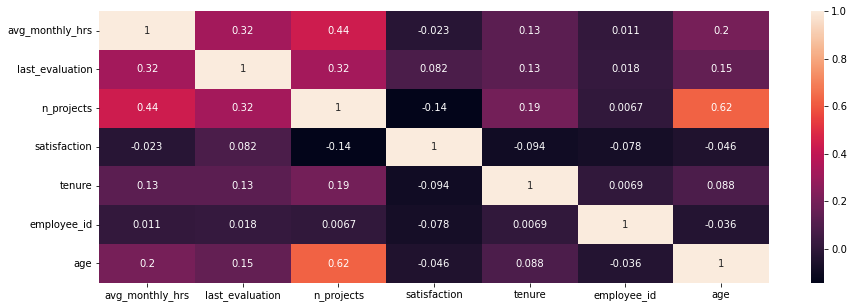

In [ ]:
# Code borrowed from Manish

plt.figure(figsize=(15,5))
sns.heatmap(DF1.corr(),annot=True)

No two variables are correlated enough to be considered dependant.

<br>
Let us look at each variable properly for EDA <br>

1) **Starting with Marital Status** - Effect of Marital Status on Attrition

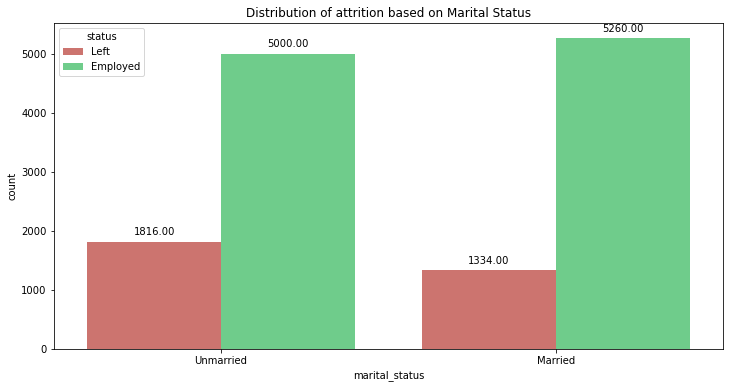

In [ ]:
# Code contributed by Manish Gupta

fig, axis1 = plt.subplots(1,1,figsize=(12,6))
splot = sns.countplot('marital_status', hue='status', data=DF1, palette=['#DB5E56','#56DB7F'], alpha = 0.95);
plt.title('Distribution of attrition based on Marital Status');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

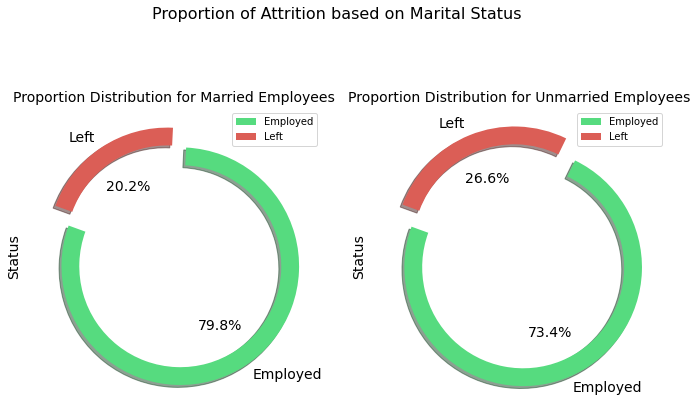

In [ ]:
# Code contributed by P. K. Muralidharan

fig = plt.figure(figsize = [10, 6])
plt.suptitle(t = 'Proportion of Attrition based on Marital Status', y = 1.02, size = 16)


plt.subplot(1, 2, 1)
space = np.ones(2)/10

DF1[DF1['marital_status']=='Married']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Proportion Distribution for Married Employees', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(1, 2, 2)
space = np.ones(2)/10
DF1[DF1['marital_status']=='Unmarried']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Proportion Distribution for Unmarried Employees', size = 14)
plt.tight_layout(pad = 3.0)

plt.show()

Marital Status **does not** seem to have a strong effect on Attrition

<br> 

2) **Gender** - Effect of Gender on Attrition

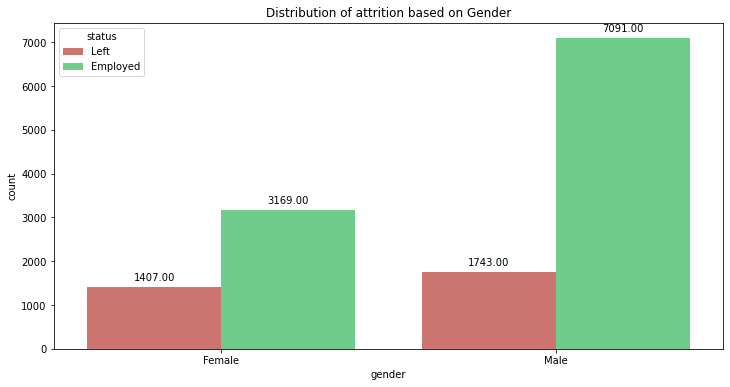

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(12,6))
splot = sns.countplot('gender', hue='status', data=DF1, palette=['#DB5E56','#56DB7F'], alpha = 0.95);
plt.title('Distribution of attrition based on Gender');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

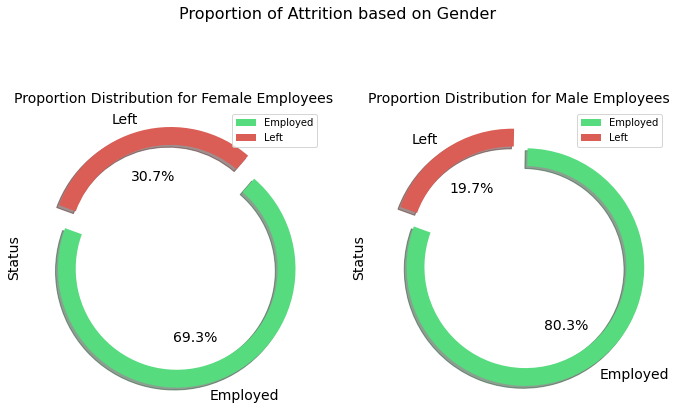

In [ ]:
fig = plt.figure(figsize = [10, 6])
plt.suptitle(t = 'Proportion of Attrition based on Gender', y = 1.02, size = 16)


plt.subplot(1, 2, 1)
space = np.ones(2)/10
DF1[DF1['gender']=='Female']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Proportion Distribution for Female Employees', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(1, 2, 2)
space = np.ones(2)/10
DF1[DF1['gender']=='Male']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Proportion Distribution for Male Employees', size = 14)
plt.tight_layout(pad = 3.0)

plt.show()

Gender does seem to have **some** effect on Attrition. So we wish to dig deeper in the next section, while looking at the age variable.

<br>

3a) **Age** - Effect of Age on Attrition
3b) **Age and Gender** combined - Effect of Age and Gender collectively, on Attrition

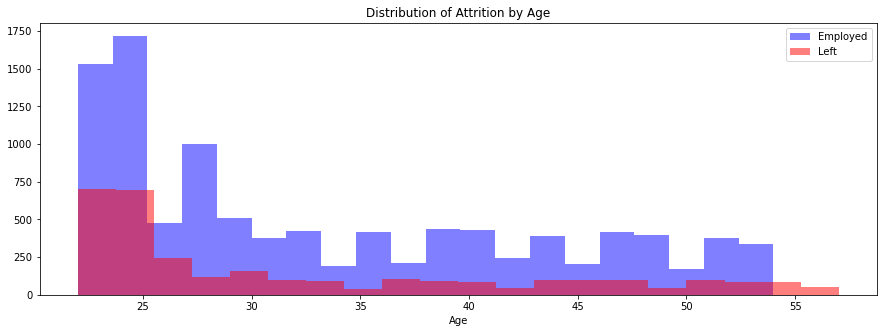

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('age', data=DF1[DF1['status'] == 'Employed'], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('age', data=DF1[DF1['status'] == 'Left'], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by Age');
plt.xlabel('Age');
plt.legend();

Overall, Age does not not seem to be a very important variable. The Attrition ratio remains same. <br>

However an interesting knowledge emerges (see below) when we look at age and gender as co-factors in attrition.

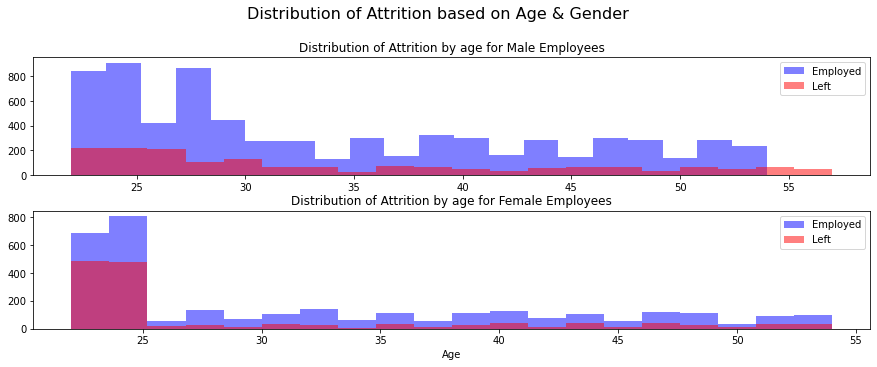

In [ ]:
fig = plt.figure(figsize = [15, 5])

plt.subplots_adjust(hspace = 0.3)

plt.suptitle(t = 'Distribution of Attrition based on Age & Gender', y = 1.02, size = 16)

plt.subplot(2, 1, 1)
#plt.figure(figsize=(15,5))
plt.hist('age', data=DF1[(DF1['status'] == 'Employed') & (DF1['gender'] == 'Male')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('age', data=DF1[(DF1['status'] == 'Left') & (DF1['gender'] == 'Male')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by age for Male Employees');
#plt.xlabel('Age');
plt.legend();

plt.subplot(2, 1, 2)
#plt.figure(figsize=(15,5))
plt.hist('age', data=DF1[(DF1['status'] == 'Employed') & (DF1['gender'] == 'Female')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('age', data=DF1[(DF1['status'] == 'Left') & (DF1['gender'] == 'Female')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by age for Female Employees');
plt.xlabel('Age');
plt.legend();

Something interesting is happening here - Company is **loosing young female workers**, at a much higher rate than average

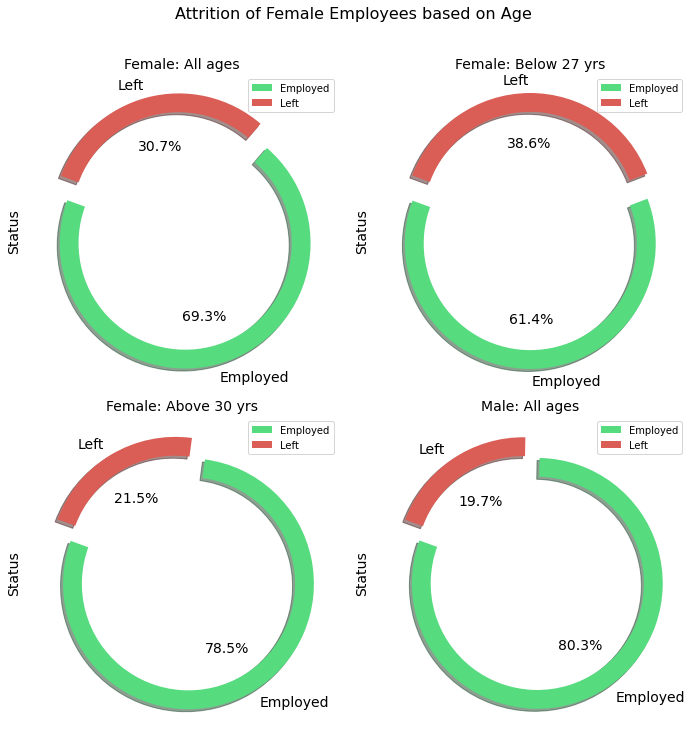

In [ ]:
fig = plt.figure(figsize = [10, 10])
plt.suptitle(t = 'Attrition of Female Employees based on Age', y = 1.02, size = 16)

plt.subplots_adjust(hspace = 0.5)

plt.subplot(2, 2, 1)
space = np.ones(2)/10
DF1[DF1['gender']=='Female']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Female: All ages', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()


#plt.show()

plt.subplot(2, 2, 2)
space = np.ones(2)/10
DF1[(DF1['gender']=='Female') & (DF1['age'] < 27)]['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Female: Below 27 yrs', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()

plt.subplot(2, 2, 3)
space = np.ones(2)/10
DF1[(DF1['gender']=='Female') & (DF1['age'] > 30)]['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Female: Above 30 yrs', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()


plt.subplot(2, 2, 4)
space = np.ones(2)/10
DF1[(DF1['gender']=='Male')]['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Male: All ages', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()


#plt.subplots_adjust(top=0.95)

plt.show()

Beyond 30 Years of age, there is not much gender influence in attrition. <br>

However Female employees below 27 years of age are **quitting** at almost double rate of the Male average rate!! <br>
What is happening here? <br>

It is **unfortunate that the company has not recognised this effect**, because in the final unseen data set, neither age nor gender is a variable, which means that the company did not deem this effect as critical.

<br>

4) **Department** - Effect of Department in Attrition

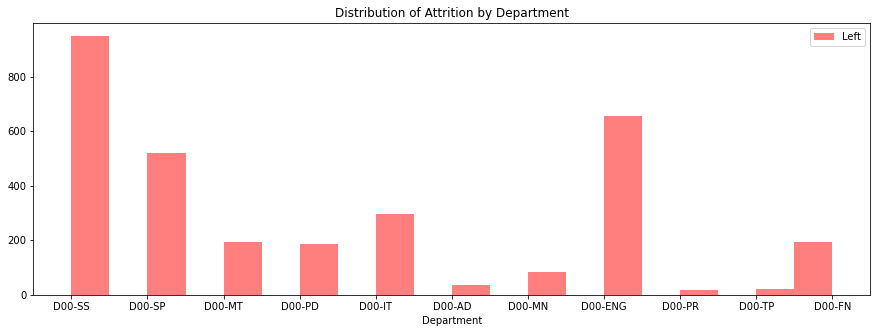

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('department', data=DF1[DF1['status'] == 'Left'], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by Department');
plt.xlabel('Department');
plt.legend();

From this figure it may seem that, D00-SS (Support) is the "worst" department in terms of retaining employees. <br>
In reality, that is not the case. We need to look at the ratio, as shown below.

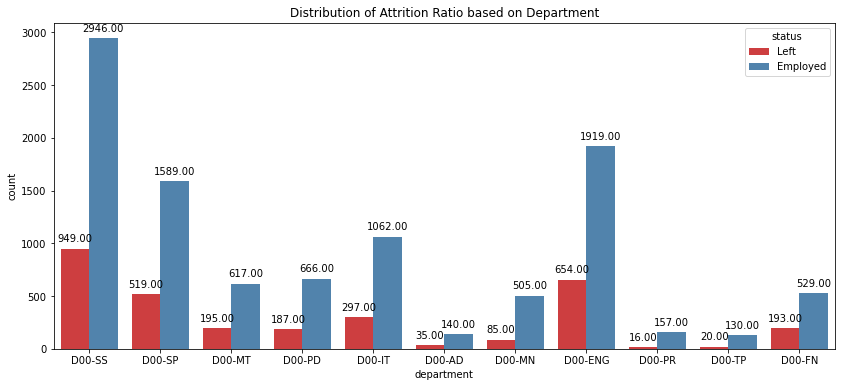

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(14,6))
splot = sns.countplot('department', hue='status', data=DF1, palette='Set1', alpha = 0.95);
plt.title('Distribution of Attrition Ratio based on Department');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Higher attrition in departments which have higher number of employees. The ratio is more or less same across Departments

<br>

5) **Salary** - Effect of Salary on Attrition

In [ ]:
DF1['salary'].unique()

array(['medium', 'low', 'high'], dtype=object)

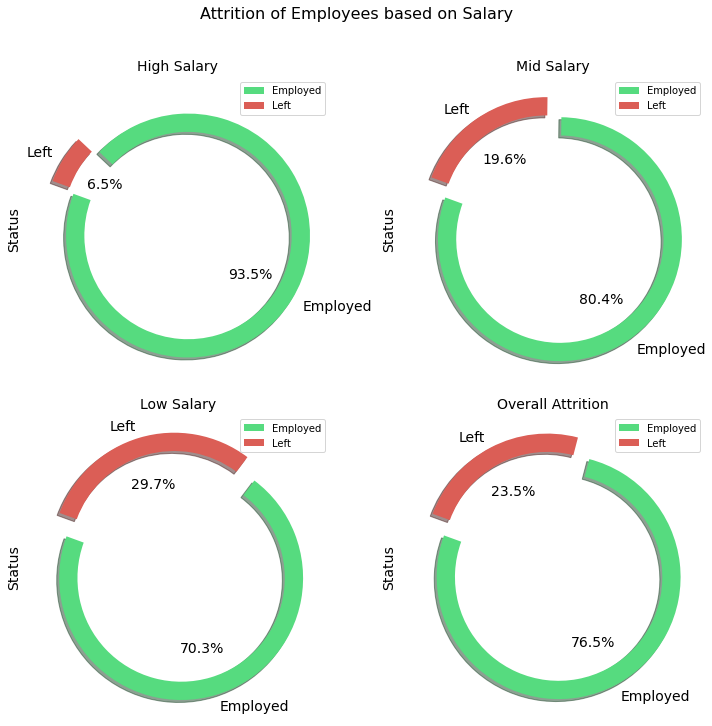

In [ ]:
fig = plt.figure(figsize = [10, 10])
plt.suptitle(t = 'Attrition of Employees based on Salary', y = 1.02, size = 16)

plt.subplots_adjust(hspace = 0.5)

plt.subplot(2, 2, 1)
space = np.ones(2)/10
DF1[DF1['salary']=='high']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'High Salary', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()


#plt.show()

plt.subplot(2, 2, 2)
space = np.ones(2)/10
DF1[(DF1['salary']=='medium')]['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Mid Salary', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()

plt.subplot(2, 2, 3)
space = np.ones(2)/10
DF1[(DF1['salary']=='low')]['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Low Salary', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()


plt.subplot(2, 2, 4)
space = np.ones(2)/10
DF1['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Overall Attrition', size = 14)
#plt.tight_layout(pad = 3.0)
plt.tight_layout()


#plt.subplots_adjust(top=0.95)

plt.show()

As expected, **Salary** is an important factor in Attrition/Retention

<br>

We shall now look at two 'Workload" related variables - <br>

6) **Average Monthly Hours** <br>

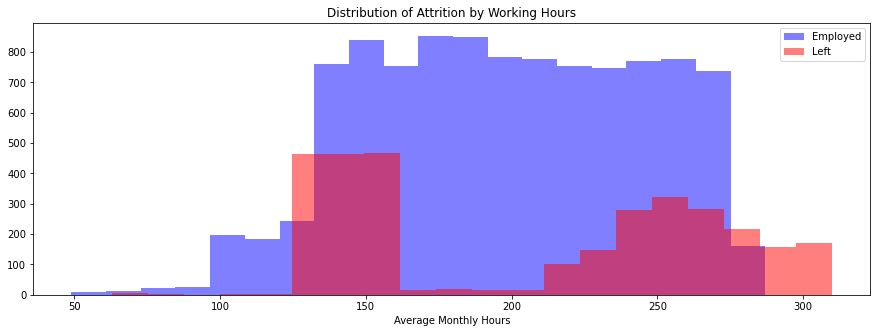

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('avg_monthly_hrs', data=DF1[DF1['status'] == 'Employed'], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('avg_monthly_hrs', data=DF1[DF1['status'] == 'Left'], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by Working Hours');
plt.xlabel('Average Monthly Hours');
plt.legend();

The peak in Attrition for **High** Average Monthly Hours is understandable. <br>
But why is there a peak around 150, which is the "peak" of people who stay.
<br>
This is a significant variable, but time permitting, one needs to look at this spurious peak.

<br>

7) **No of Projects**

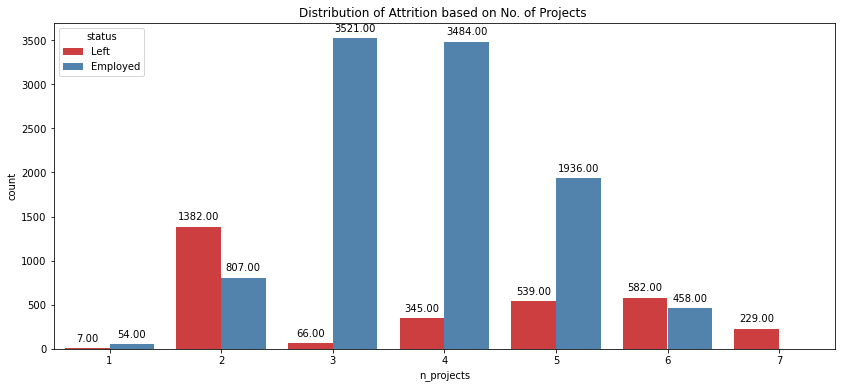

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(14,6))
splot = sns.countplot('n_projects', hue='status', data=DF1, palette='Set1', alpha = 0.95);
plt.title('Distribution of Attrition based on No. of Projects ');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Like previous variable, it is puzzling, why people with just 2 projects would leave. A deeper analysis may be needed here. <br>

However overall we can say that "n_projects" is a significant variable. <br>
There seems to be a 'sweet spot' at 3 projects. Beyond that ratio of Attrition rises and employees too much workload start leaving. <br> <br>

This is a variable that we wish to analyse a little more in conjunction with tenure. See below.

<br>

8) **Tenure** - How long to Employees stay?

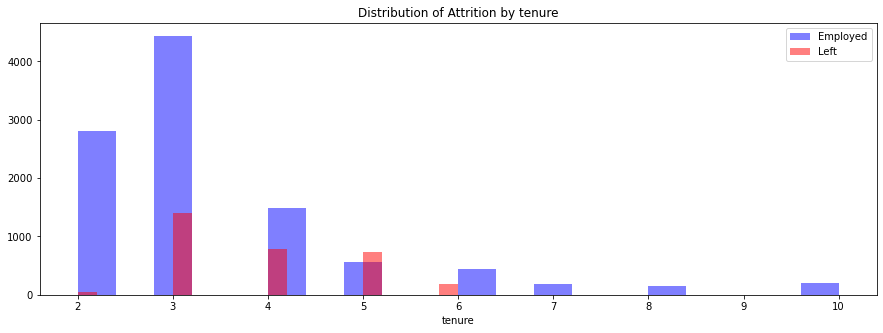

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('tenure', data=DF1[DF1['status'] == 'Employed'], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('tenure', data=DF1[DF1['status'] == 'Left'], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by tenure');
plt.xlabel('tenure');
plt.legend();

As expected, people who are with the company for > 6 years are "happy" and not leaving. <br>
Also, people who have been around for < 3 years are still evaluating the company and vice versa. <br>
<br>
But something interesting is happening in between. Lets check the 3-6 years. **People start leaving more and more starting at 3 years and peaking at 5. Why??**
<br>
Below we conduct an analysis where tenure and n_projects are considered in conjunction

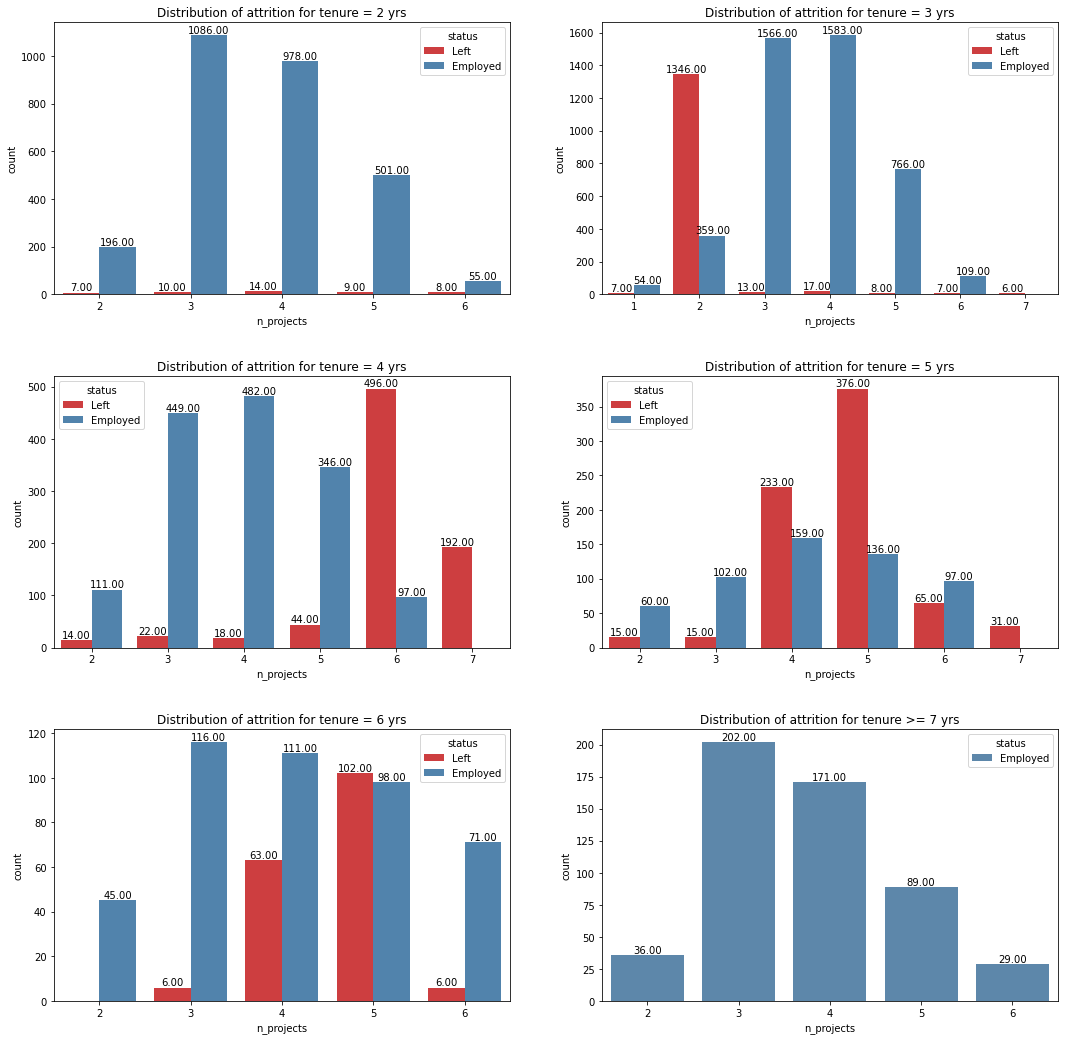

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(18,18))
plt.subplots_adjust(hspace = 0.3)

splot = sns.countplot('n_projects', ax=axes[0,0], hue='status', data=DF1[DF1['tenure']==2], palette='Set1', alpha = 0.95);
axes[0,0].set_title('Distribution of attrition for tenure = 2 yrs');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
splot = sns.countplot('n_projects', ax=axes[0,1], hue='status', data=DF1[DF1['tenure']==3], palette='Set1', alpha = 0.95);
axes[0,1].set_title('Distribution of attrition for tenure = 3 yrs');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
splot = sns.countplot('n_projects', ax=axes[1,0], hue='status', data=DF1[(DF1['tenure'] == 4)], palette='Set1', alpha = 0.95);
axes[1,0].set_title('Distribution of attrition for tenure = 4 yrs');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
splot = sns.countplot('n_projects', ax=axes[1,1], hue='status', data=DF1[(DF1['tenure'] == 5)], palette='Set1', alpha = 0.95);
axes[1,1].set_title('Distribution of attrition for tenure = 5 yrs');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
splot = sns.countplot('n_projects', ax=axes[2,0], hue='status', data=DF1[(DF1['tenure'] == 6)], palette='Set1', alpha = 0.95);
axes[2,0].set_title('Distribution of attrition for tenure = 6 yrs');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
splot = sns.countplot('n_projects', ax=axes[2,1], hue='status', data=DF1[(DF1['tenure'] > 6)], palette=['#4682B4','#DC143C'], alpha = 0.95);
axes[2,1].set_title('Distribution of attrition for tenure >= 7 yrs');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

This is informative: <br>
The peak of attrition at just **2 projects** workload, is almost entirely contributed by people in their 3rd year. <br>
4th year - more projects == better employees or == overworked employees? They have enough experience, they leave. <br>
5th year - enough experience, can handle 4+ projects, they leave. <br>
6th year - the trend of 5th year continues, but to a lesser extent. <br>
7+ years - if they stay beyond 6 years - they stay.

<br>
At this point, lets check if the company is evaluating their employees correctly - last_evaluation and recently promoted. <br>

<br>

9) **last evaluation** - How does evaluation help (or not)?

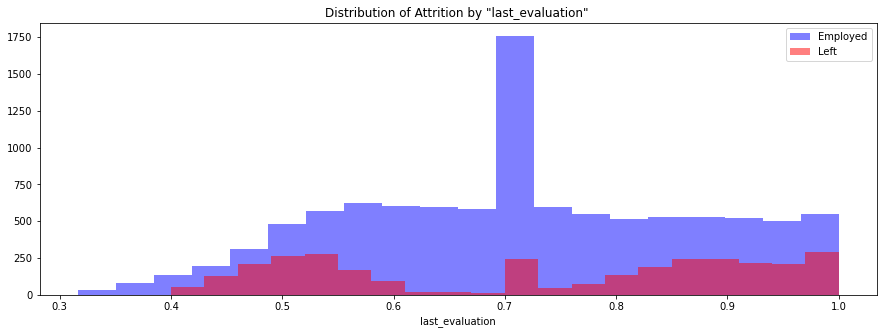

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('last_evaluation', data=DF1[DF1['status'] == 'Employed'], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('last_evaluation', data=DF1[DF1['status'] == 'Left'], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by "last_evaluation" ');
plt.xlabel('last_evaluation');
plt.legend();

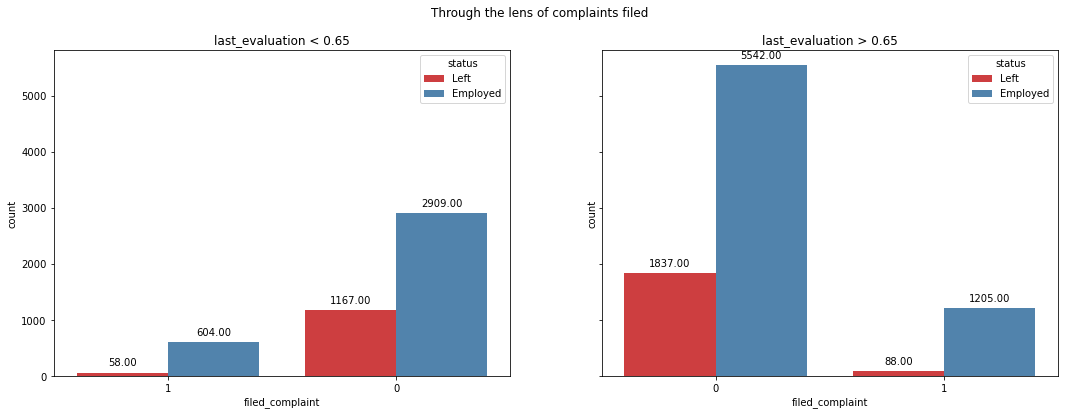

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
fig.suptitle('Through the lens of complaints filed')

splot = sns.countplot('filed_complaint', ax=axes[0], hue='status', data=DF1[DF1['last_evaluation']<0.65], palette='Set1', alpha = 0.95);
axes[0].set_title('last_evaluation < 0.65')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
splot = sns.countplot('filed_complaint', ax=axes[1], hue='status', data=DF1[DF1['last_evaluation']>0.65], palette='Set1', alpha = 0.95);
axes[1].set_title('last_evaluation > 0.65')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

More people remained with the company, if their last_evaluation was good. <br>
<br>
And the final variable from the Company's point of view - <br>

10) **recently promoted** - Does it help to retain employees?

In [ ]:
DF1['recently_promoted'].unique()

array(['0', '1'], dtype=object)

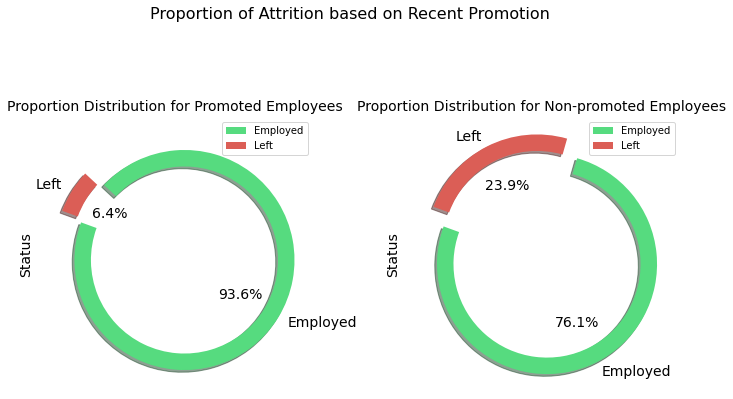

In [ ]:
fig = plt.figure(figsize = [10, 6])
plt.suptitle(t = 'Proportion of Attrition based on Recent Promotion', y = 1.02, size = 16)


plt.subplot(1, 2, 1)
space = np.ones(2)/10

DF1[DF1['recently_promoted']=='1']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Proportion Distribution for Promoted Employees', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(1, 2, 2)
space = np.ones(2)/10
DF1[DF1['recently_promoted']=='0']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Proportion Distribution for Non-promoted Employees', size = 14)
plt.tight_layout(pad = 3.0)

plt.show()

Clearly, rewarding employees with promotion works in favour of company - they stay.

Who are the employees that are being promoted by the company?

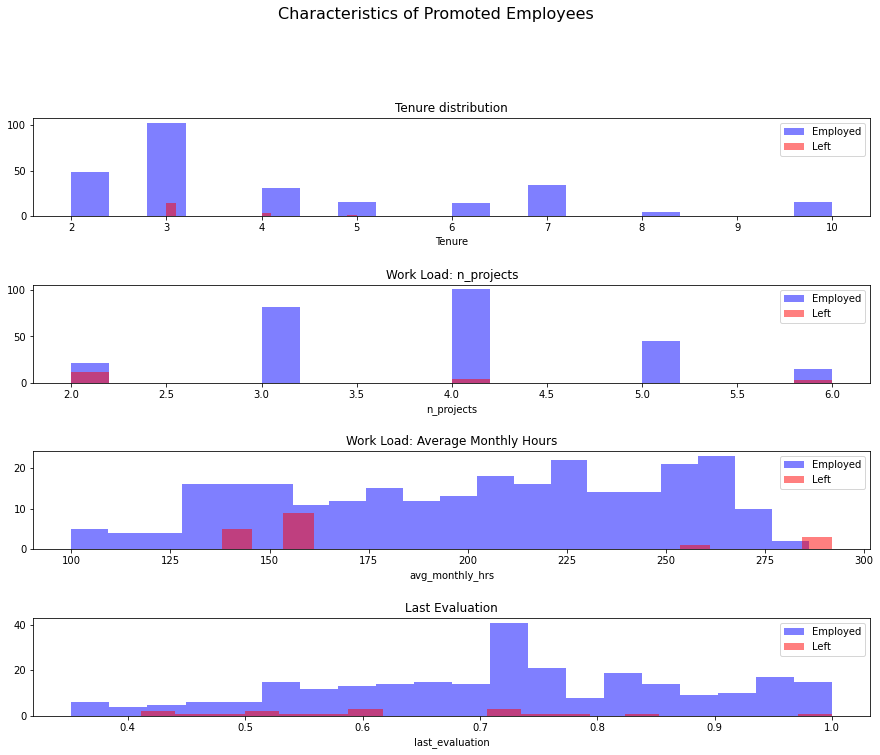

In [ ]:
fig = plt.figure(figsize = [15, 11])

plt.subplots_adjust(hspace = 0.7)

plt.suptitle(t = 'Characteristics of Promoted Employees ', y = 1.02, size = 16)

plt.subplot(4, 1, 1)
#plt.figure(figsize=(15,5))
plt.hist('tenure', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('tenure', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Tenure distribution');
plt.xlabel('Tenure');
plt.legend();

plt.subplot(4, 1, 2)
#plt.figure(figsize=(15,5))
plt.hist('n_projects', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('n_projects', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Work Load: n_projects');
plt.xlabel('n_projects');
plt.legend();

plt.subplot(4, 1, 3)
#plt.figure(figsize=(15,5))
plt.hist('avg_monthly_hrs', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('avg_monthly_hrs', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Work Load: Average Monthly Hours');
plt.xlabel('avg_monthly_hrs');
plt.legend();

plt.subplot(4, 1, 4)
plt.hist('last_evaluation', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('last_evaluation', data=DF1[DF1['recently_promoted']=='1'][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Last Evaluation');
plt.xlabel('last_evaluation');
plt.legend();

The company promotes all sorts of employees as incentive

<br>

Lets finally check the point of view of the employees <br>

Since the goal is to understand why "Employees Leave?", lets look at how they feel about the company <br> 

Our final section for the EDA - lets look at the problem from the **point of view of employee's 'satisfaction' and dissatisfaction ('filed_complain)**

11) **satisfaction** - Are all satisfied employees staying? <br>

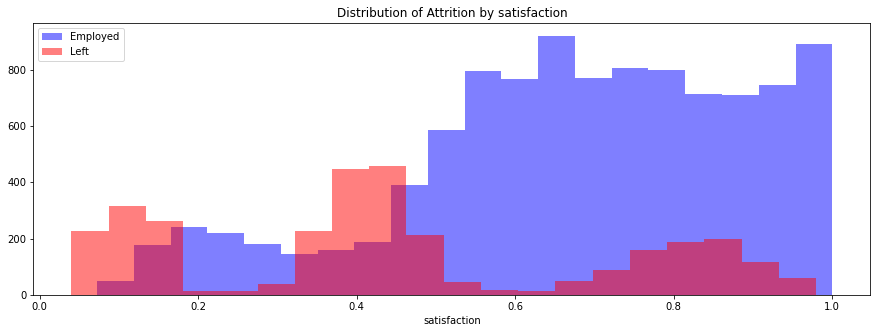

In [ ]:
# Code contributed by Manish Gupta

plt.figure(figsize=(15,5))
plt.hist('satisfaction', data=DF1[DF1['status'] == 'Employed'], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('satisfaction', data=DF1[DF1['status'] == 'Left'], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Distribution of Attrition by satisfaction');
plt.xlabel('satisfaction');
plt.legend();

It is easy to understand the attrition peak on the left - employees who are least satisfied leave. <br>
Even the middle peak of attrition is understandable. These are still employees who are dissatisfied. <br>
However the attrition peak at highest satisfaction is puzzling. We shall take a deeper look at it below. <br>

<br>

Lets see who are the Employees who are satisfied, but still choose to leave.

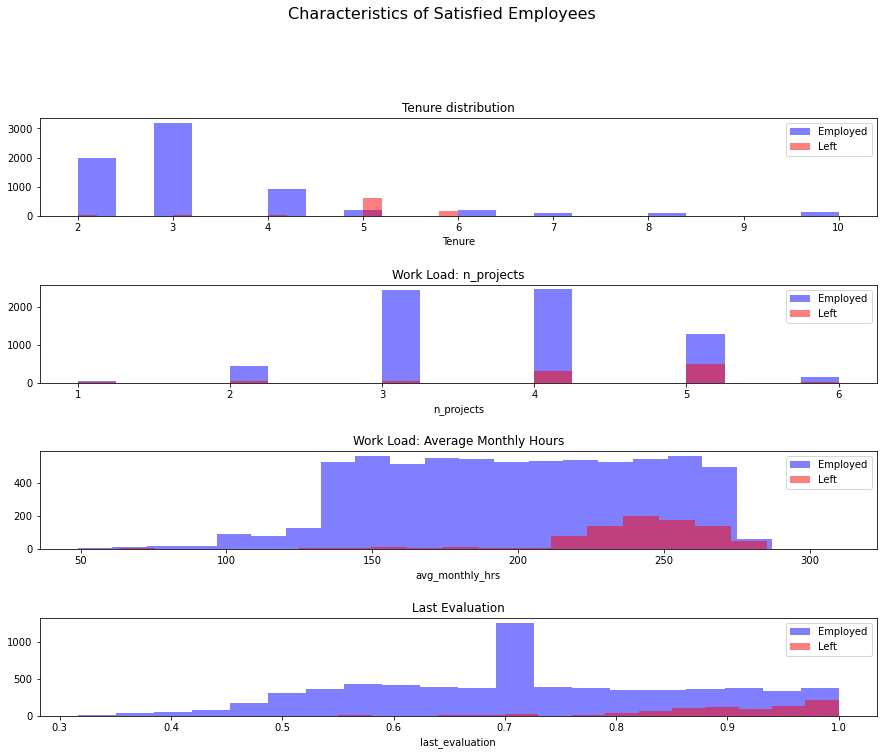

In [ ]:
fig = plt.figure(figsize = [15, 11])

plt.subplots_adjust(hspace = 0.7)

plt.suptitle(t = 'Characteristics of Satisfied Employees ', y = 1.02, size = 16)

plt.subplot(4, 1, 1)
#plt.figure(figsize=(15,5))
plt.hist('tenure', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('tenure', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Tenure distribution');
plt.xlabel('Tenure');
plt.legend();

plt.subplot(4, 1, 2)
#plt.figure(figsize=(15,5))
plt.hist('n_projects', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('n_projects', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Work Load: n_projects');
plt.xlabel('n_projects');
plt.legend();

plt.subplot(4, 1, 3)
#plt.figure(figsize=(15,5))
plt.hist('avg_monthly_hrs', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('avg_monthly_hrs', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Work Load: Average Monthly Hours');
plt.xlabel('avg_monthly_hrs');
plt.legend();

plt.subplot(4, 1, 4)
plt.hist('last_evaluation', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Employed')], bins = 20, alpha=0.5, label='Employed', color='blue');
plt.hist('last_evaluation', data=DF1[DF1['satisfaction'] > 0.6][(DF1['status'] == 'Left')], bins = 20, alpha=0.5, label='Left', color='red');
plt.title('Last Evaluation');
plt.xlabel('last_evaluation');
plt.legend();

The above analysis is informative! <br>

The SATISFIED employees WHO LEAVE are also ones who are competent and can handle higher workloads. Company should concentrate on retaining them. 

<br>

12) **filed complains** - Does filing complains help in keeping the employees?

In [ ]:
# Code contributed by P K Muralidharan
print("For 'satisfaction' = All\n", DF1.groupby(['filed_complaint','status'])['status'].count())

For 'satisfaction' = All
 filed_complaint  status  
0                Employed    8451
                 Left        3004
1                Employed    1809
                 Left         146
Name: status, dtype: int64


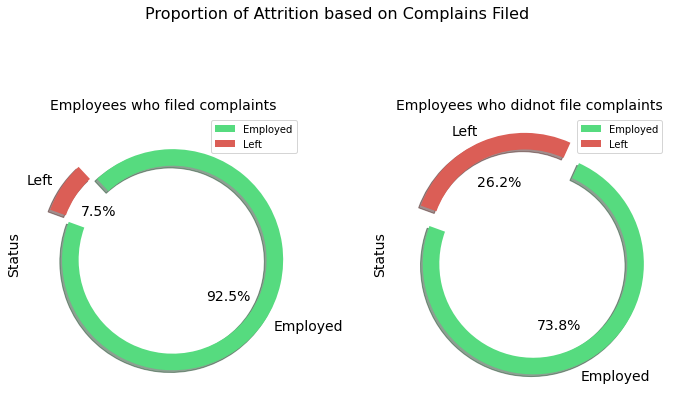

In [ ]:
fig = plt.figure(figsize = [10, 6])
plt.suptitle(t = 'Proportion of Attrition based on Complains Filed', y = 1.02, size = 16)


plt.subplot(1, 2, 1)
space = np.ones(2)/10

DF1[DF1['filed_complaint']=='1']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Employees who filed complaints', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(1, 2, 2)
space = np.ones(2)/10
DF1[DF1['filed_complaint']=='0']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [10, 6], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Employees who didnot file complaints', size = 14)
plt.tight_layout(pad = 3.0)

plt.show()

<br>

Lets now check out an analysis combining the two Employee satisfaction variables - satisfaction and complaints filed. 

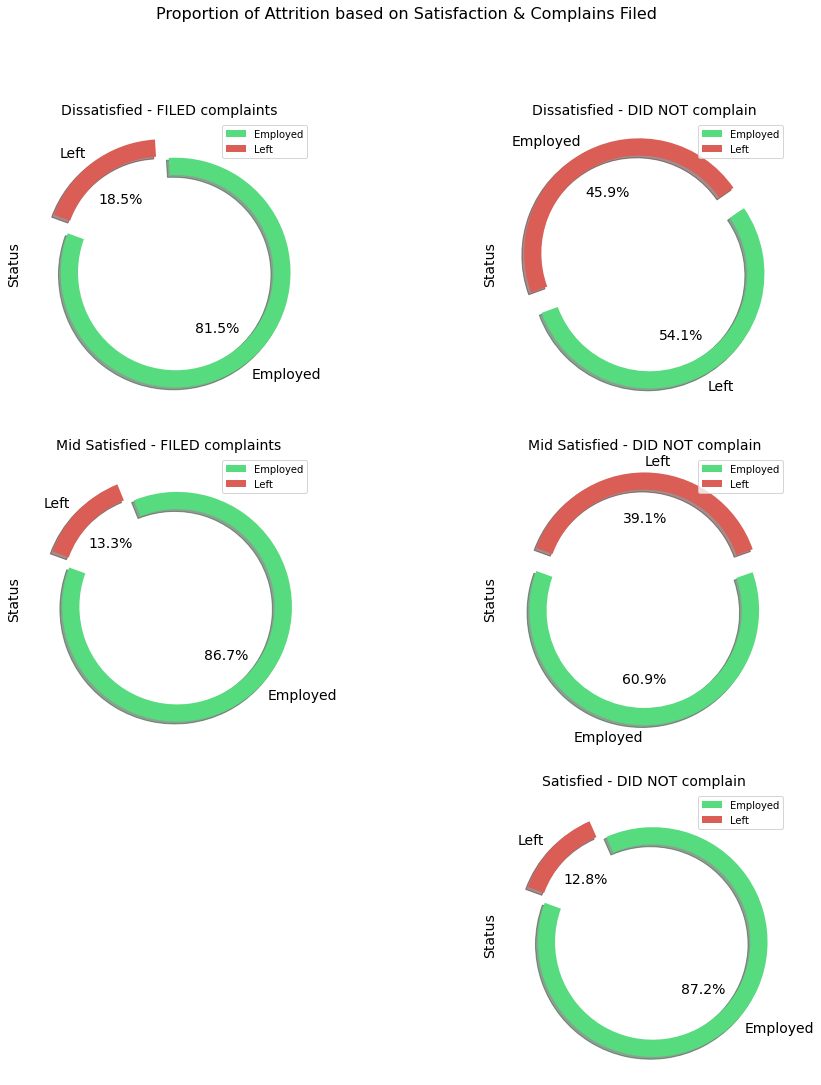

In [ ]:
fig = plt.figure(figsize = [15, 15])
plt.suptitle(t = 'Proportion of Attrition based on Satisfaction & Complains Filed', y = 1.02, size = 16)


plt.subplot(3, 2, 1)
space = np.ones(2)/10

DF1[DF1['satisfaction'] < 0.3][DF1['filed_complaint']=='1']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Dissatisfied - FILED complaints', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(3, 2, 2)
space = np.ones(2)/10
DF1[DF1['satisfaction'] < 0.3][DF1['filed_complaint']=='0']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 200, legend = False, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Dissatisfied - DID NOT complain', size = 14)
plt.tight_layout(pad = 3.0)


plt.subplot(3, 2, 3)
space = np.ones(2)/10

DF1[(DF1['satisfaction'] > 0.3) & (DF1['satisfaction'] < 0.6)][DF1['filed_complaint']=='1']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Mid Satisfied - FILED complaints', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(3, 2, 4)
space = np.ones(2)/10
DF1[(DF1['satisfaction'] > 0.3) & (DF1['satisfaction'] < 0.6)][DF1['filed_complaint']=='0']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Mid Satisfied - DID NOT complain', size = 14)
plt.tight_layout(pad = 3.0)


plt.subplot(3, 2, 5)
space = np.ones(2)/10

DF1[DF1['satisfaction'] > 0.6][DF1['filed_complaint']=='1']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Satisfied - FILED complaints', size = 14)
plt.tight_layout(pad = 3.0)
#plt.show()

plt.subplot(3, 2, 6)
space = np.ones(2)/10
DF1[DF1['satisfaction'] > 0.6][DF1['filed_complaint']=='0']['status'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Employed', 'Left'])
plt.ylabel(ylabel = 'Status', size = 14)
plt.title(label = 'Satisfied - DID NOT complain', size = 14)
plt.tight_layout(pad = 3.0)

plt.show()

Bottom left Pie Chart Absent == Satisfied Employees who Filed Complains did not leave. 

Just to be sure, lets check the numbers - below.

In [ ]:
DF1[DF1['satisfaction'] > 0.6][DF1['filed_complaint']=='1']['status'].value_counts()

Employed    1227
Left          44
Name: status, dtype: int64

The pie chart did not show up because only ~ 3% Left.

<br>

Bottom line on 'satisfaction' and 'filed_complaint'

**Employees who use official channel to vent grudge is >= 4 times LESS likely to attrite/leave**

<h1><center>
Recommendation to client based on EDA
</center></h1>

1) The company is neglecting the **Attrition of Young Female employees**. You should look into why THEY are leaving at a much higher rate than average. You could ask them, what measures will help to retain them. <br>

2) The company promotes just about everyone irrespective of their performance. While that will encourage employees, the higher achievers or more competent people need additional incentives - see (3) below. <br>

3) A section of the highly satisfied Employees are leaving the company! We see that these are people who have high competence (tenure > 4 years, n_projects >=4, Avg_monthly_hrs > 200, Last_evaluation > 0.8). These are people who will be valued by other Employers and offered good jobs. Here, the current company needs to incentivise them in a targeted way, to retain them. As far as Attrition problem goes, this is the pool where the company should focus most. **For satisfied Employees - check they are feeling overworked. If not, increase their incentives, if they are high performers.** <br>

4) Contrary to intuition, the employees who "file complain" are less likely to leave. Pay attention to the channel where the Employees complain and get their grudges resolved. For all categories of employees, if they have filed a complain, they are less likely to leave. **Form a clear and fair channel where employees can "complain and seek resolution".**

In [ ]:
DF1_AtEndOfEda = DF1.copy() # Keeping a copy before the dataframe is scaled and split and fit-transformed.
DF3 = DF1.copy() # Making a copy to be changed into exact copy of Manish Gupta's dataframe.

<h1><center>
Module E1: Quick view of various ML models using Pycaret
</center></h1>
(Done by Manish Gupta; Integrated with EDA by Susmita Chakravorty)

In [ ]:
!pip install pycaret 

In [ ]:
#from pycaret.classification import *

In [ ]:
#clf1 = setup(data = DF1, 
          #target = 'status')

In [ ]:
#compare_models()

In [ ]:
#lightgbm  = create_model('lightgbm')

In [ ]:
#tuned_gbm = tune_model(lightgbm)

In [ ]:
#predictions = predict_model(lightgbm )

In [ ]:
#predictions = predict_model(tuned_gbm)

In [ ]:
#evaluate_model(lightgbm)

Using compare_model() we get a preliminary idea about which will be the best models to fit this data. <br>
We shall do the analysis in details for the **two best models - lightgbm and random forest** and **Logistic Regression** which was predicted to be the **2nd worst model**

<br> 
Although Module E1 successfully ran for Group member Manish Gupta, The submitter (Susmita Chakravorty) could not make it run successfully in google colab or in her local system at the final stage. Several package related issues. <br>

Hence we simply take the conclusions from this module (as inferred by Manish Gupta earlier) and proceed to Module E2 of Machine Learning modeling.

<h1><center>
Module E2: Machine Learning Modeling 
</center></h1>
(Done by Manish Gupta; Integrated with EDA by Susmita Chakravorty; Aided by P K Muralidharan & others)

<br>

1) **Step 1: Label Encode target variable** <br>
[a] Label Encode target variable 'status', which is a categorical variable with values 'Left' & 'Employed' <br>
[b] The encoding turns the variable to integers. But they need to be objects 1, 0 <br>
[c] Finally converting the target to object with values '1'(=='Left') & '0'(=='Employed')

In [ ]:
DF1 = DF1_AtEndOfEda.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DF1['status']=le.fit_transform(DF1['status'])
DF1['status'].dtype

dtype('int64')

In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 0 to 13409
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    13410 non-null  object 
 3   last_evaluation    13410 non-null  float64
 4   n_projects         13410 non-null  int64  
 5   recently_promoted  13410 non-null  object 
 6   salary             13410 non-null  object 
 7   satisfaction       13410 non-null  float64
 8   status             13410 non-null  int64  
 9   tenure             13410 non-null  float64
 10  employee_id        13410 non-null  int64  
 11  age                13410 non-null  int64  
 12  gender             13410 non-null  object 
 13  marital_status     13410 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 2.0+ MB


<br>

2) **Scaling the numerical variables** <br>
The choice of the retained numerical variables (as well as the categorical ones) are based on the ones that are present in the Unseen Data. <br>
Numerical variables need to be scaled before splitting into train and test and then fitting

In [ ]:
num=['avg_monthly_hrs','last_evaluation', 'n_projects', 'satisfaction', 'tenure']
#cat=['filed_complaint', 'recently_promoted', 'salary', 'gender','marital_status']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DF1[(num)]=scaler.fit_transform(DF1[(num)])

In [ ]:
DF1.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,-0.866324,D00-SS,1,-1.496916,-1.426462,0,medium,-0.873159,1,-0.340288,126150,24,Female,Unmarried
1,1.100577,D00-SP,0,1.482282,1.773146,0,low,-1.885489,1,0.341813,125346,51,Female,Married
2,-1.063014,D00-SS,0,-1.293523,-1.426462,0,medium,-0.753732,1,-0.340288,113707,23,Female,Unmarried
3,-1.279373,D00-MT,0,-1.447381,-1.426462,0,low,-0.967740,1,-0.340288,121685,23,Female,Unmarried
4,1.375943,D00-PD,0,0.905901,1.773146,0,low,-1.806788,1,0.341813,119912,24,Female,Unmarried


<br>

3) **Choosing the independant (X) and target (Y) variables**

In [ ]:
X = DF1.drop(columns=['status','marital_status','age','gender','employee_id'], axis=1) # dropping the redundant variables 
Y = DF1['status'] # Choosing the target variable

<br> 

4) **One Hot Encoding the categorical independant variables**

In [ ]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from category_encoders import OneHotEncoder
oe = OneHotEncoder( handle_unknown='ignore',cols=['filed_complaint', 'recently_promoted','salary','department'])
X = oe.fit_transform(X)

In [ ]:
X.head()

,avg_monthly_hrs,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,department_10,department_11,filed_complaint_1,filed_complaint_2,last_evaluation,n_projects,recently_promoted_1,recently_promoted_2,salary_1,salary_2,salary_3,satisfaction,tenure
0,-0.866324,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.496916,-1.426462,1,0,1,0,0,-0.873159,-0.340288
1,1.100577,0,1,0,0,0,0,0,0,0,0,0,0,1,1.482282,1.773146,1,0,0,1,0,-1.885489,0.341813
2,-1.063014,1,0,0,0,0,0,0,0,0,0,0,0,1,-1.293523,-1.426462,1,0,1,0,0,-0.753732,-0.340288
3,-1.279373,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.447381,-1.426462,1,0,0,1,0,-0.967740,-0.340288
4,1.375943,0,0,0,1,0,0,0,0,0,0,0,0,1,0.905901,1.773146,1,0,0,1,0,-1.806788,0.341813


In [ ]:
print(X.shape)
print(Y.shape)

(13410, 23)
(13410,)


<br> 

5) **Making the Train and Test Datasets** at respectively 75% and 25%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

<br>

6) **Using lightgbm as the model and calculating checking its model 'goodness'**

In [ ]:
#lightgbm  = create_model('lightgbm')

In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model, X, Y)

Accuracy is 97.13689233522219
Cross validation(F1) is 94.65199362903431


In [ ]:
# classify function [Code by Manish Gupta]
#print(y_train.dtype)
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, Y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)

In [ ]:
classify(model, X, Y)

Accuracy is 97.13689233522219
Cross validation(F1) is 94.65199362903431


<br> 
Checking the goodness of fit numbers for Test data 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for TEST data')
print(cm)
print('Measures of Goodness of fit for TEST data')
print('------------------------------------------')
print(classification_report(y_test,y_pred))
print('------------------------------------------')
print("accuracy score",accuracy_score(y_test,y_pred))

Confusion Matrix for TEST data
[[2512   32]
 [  64  745]]
Measures of Goodness of fit for TEST data
------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2544
           1       0.96      0.92      0.94       809

    accuracy                           0.97      3353
   macro avg       0.97      0.95      0.96      3353
weighted avg       0.97      0.97      0.97      3353

------------------------------------------
accuracy score 0.9713689233522219


Lets now compare the numbers for Train and Test data to see if we are **overfitting** or **underfitting**

In [ ]:
y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

report_train = classification_report(y_train, y_train_pred_count)
report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(report_train)
print('                    Testing Report           ')
print(report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7716
           1       0.99      0.97      0.98      2341

    accuracy                           0.99     10057
   macro avg       0.99      0.98      0.99     10057
weighted avg       0.99      0.99      0.99     10057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2544
           1       0.96      0.92      0.94       809

    accuracy                           0.97      3353
   macro avg       0.97      0.95      0.96      3353
weighted avg       0.97      0.97      0.97      3353



<br>

Lets now plot Precision and Recall

In [ ]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)
    
  plt.show()

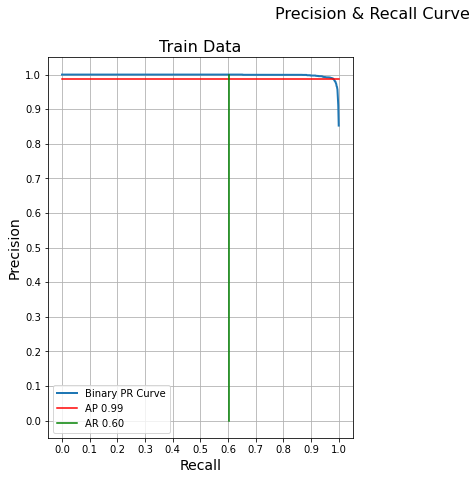

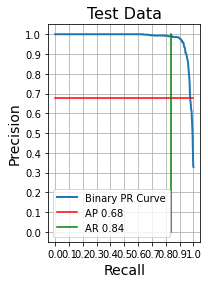

In [ ]:
y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

y_train_pred_proba = model.predict_proba(x_train)
y_test_pred_proba = model.predict_proba(x_test)

figure = plt.figure(figsize = [12, 7])
plt.suptitle('Precision & Recall Curve', size = 16)

plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')


plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.show()

<br>

Lets now plot the Confusion Matrix

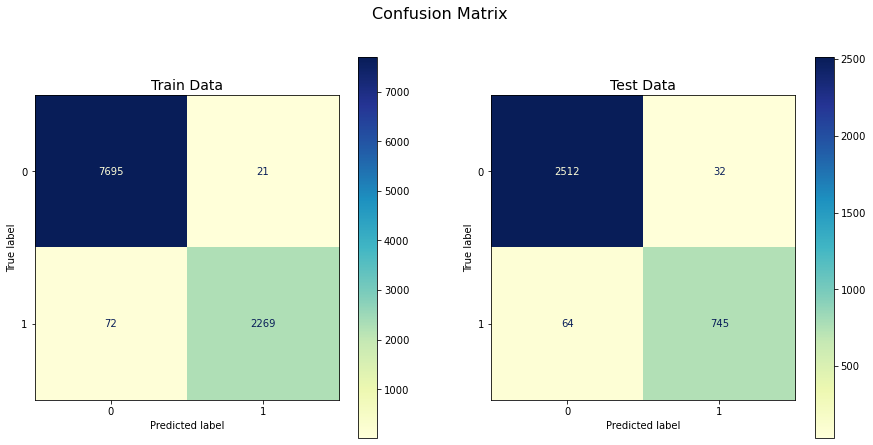

In [ ]:
y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

y_train_pred_proba = model.predict_proba(x_train)
y_test_pred_proba = model.predict_proba(x_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = model, X = x_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = model, X = x_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

<br>

7) After modeling, lets check the **Feature Importance** <br>
Which are the variables that contributed most to the predictions, as they are

<AxesSubplot:>

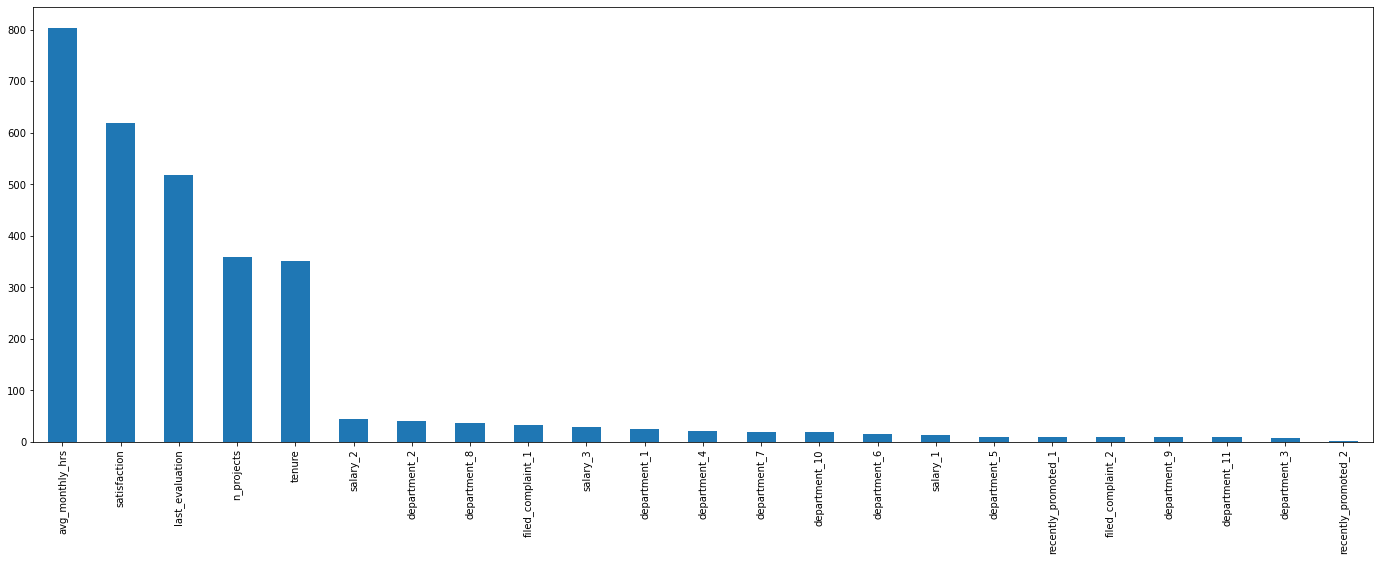

In [ ]:
f_imp = pd.Series(model.feature_importances_)
f_imp.index = x_train.columns
f_imp.sort_values(ascending=False).plot.bar(figsize=(24, 8))

<h1><center>
Module F: Predicting Probabilities for Unseen Data
</center></h1>
(Done by Manish Gupta; Integrated with rest of analysis by Susmita Chakravorty)

<br>

1) **Handling the Unseen data before fit and predict** <br>
[a] Check the data <br>
[b] Clean the data <br>
[c] Impute missing values <br>

In [ ]:
DF_Unseen=pd.read_csv('UnseenData.csv')

In [ ]:
DF_Unseen.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [ ]:
DF_Unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(DF_Unseen)

,Total,Percent
recently_promoted,97,97.0
filed_complaint,85,85.0
last_evaluation,17,17.0
satisfaction,3,3.0
tenure,3,3.0
department,2,2.0
avg_monthly_hrs,0,0.0
n_projects,0,0.0
salary,0,0.0
employee_id,0,0.0


In [ ]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [ ]:
print('Contains Redundant Records?:',DF_Unseen.duplicated().any())
print('Duplicate Count:', DF_Unseen.duplicated().sum())
print('-----------------------------------------------------------------------')
print('Contains Redundant Features?:', duplicate_cols(DF_Unseen))

Contains Redundant Records?: False
Duplicate Count: 0
-----------------------------------------------------------------------
Contains Redundant Features?: None


In [ ]:
DF_Unseen['recently_promoted'] =DF_Unseen['recently_promoted'].fillna(0)
DF_Unseen['filed_complaint'] =DF_Unseen['filed_complaint'].fillna(0)

In [ ]:
raw_num_test = knn_imputer.transform(DF_Unseen[['last_evaluation', 'satisfaction', 'tenure']])
raw_frame_test = pd.DataFrame(data = raw_num_test, columns = ['last_evaluation', 'satisfaction', 'tenure'])

DF_Unseen['last_evaluation'] = raw_frame_test['last_evaluation']
DF_Unseen['satisfaction'] = raw_frame_test['satisfaction']
DF_Unseen['tenure'] = raw_frame_test['tenure']

In [ ]:
DF_Unseen['department']=DF_Unseen['department'].fillna(DF_Unseen['department'].mode()[0])

In [ ]:
missing_data(DF_Unseen)

,Total,Percent
avg_monthly_hrs,0,0.0
department,0,0.0
filed_complaint,0,0.0
last_evaluation,0,0.0
n_projects,0,0.0
recently_promoted,0,0.0
salary,0,0.0
satisfaction,0,0.0
tenure,0,0.0
employee_id,0,0.0


In [ ]:
DF_Unseen_2=DF_Unseen.copy()

<br>

2) Matching data types with original data set

In [ ]:
DF_Unseen['avg_monthly_hrs'] = DF_Unseen['avg_monthly_hrs'].astype(float)
DF_Unseen['filed_complaint']=DF_Unseen['filed_complaint'].astype(int)
DF_Unseen['filed_complaint']=DF_Unseen['filed_complaint'].astype(str)
DF_Unseen['n_projects'] = DF_Unseen['n_projects'].astype(float)
DF_Unseen['recently_promoted']=DF_Unseen['recently_promoted'].astype(int)
DF_Unseen['recently_promoted']=DF_Unseen['recently_promoted'].astype(str)

In [ ]:
DF_Unseen= DF_Unseen.drop(columns=['employee_id'], axis=1)

In [ ]:
DF_Unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    float64
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    object 
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    float64
 5   recently_promoted  100 non-null    object 
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [ ]:
#num=['avg_monthly_hrs','last_evaluation', 'n_projects', 'satisfaction', 'tenure']
#cat=['filed_complaint', 'recently_promoted', 'salary']

In [ ]:
DF_Unseen = oe.transform(DF_Unseen)

In [ ]:
DF_Unseen[(num)]=scaler.transform(DF_Unseen[(num)])

In [ ]:
DF_Unseen.head()

,avg_monthly_hrs,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,department_10,department_11,filed_complaint_1,filed_complaint_2,last_evaluation,n_projects,recently_promoted_1,recently_promoted_2,salary_1,salary_2,salary_3,satisfaction,tenure
0,-1.299042,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,-1.162121,-1.426462,1,0,0,1,0,-0.891777,-0.340288
1,0.412162,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.401340,-1.426462,1,0,0,1,0,0.549862,-0.340288
2,-0.866324,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,-1.062206,-1.426462,1,0,1,0,0,-1.148774,-0.340288
3,-1.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,-0.432367,0.173342,1,0,1,0,0,0.841065,-1.022389
4,-1.279373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,-1.615800,-1.426462,1,0,0,1,0,-1.211949,1.023914


In [ ]:
pred_test=model.predict_proba(DF_Unseen)

In [ ]:
pred_prob=pred_test[:,1]

In [ ]:
submission = pd.DataFrame({'employee_id':DF_Unseen_2['employee_id'],'probabilities':pred_prob})

In [ ]:
#Visualize the first 5 rows and save in a Submission.csv
submission.head()
submission.to_csv('Submission.csv',header=False,index=False)
submission.to_csv('1008_GCD_Capstone_Project.csv',header=False,index=False)

In [ ]:
submission.head()

,employee_id,probabilities
0,119045,0.992923
1,112223,0.030599
2,103924,0.985172
3,105922,0.001491
4,103297,0.521488


<h1><center>
Module G: Discussion on fitting the data with Random Forest, which was predicted to be the 2nd best model
</center></h1>
(Done by Susmita Chakravorty, aided by Manish Gupta's analysis above)

In [ ]:
DF_AltModel_Data = DF1_AtEndOfEda.copy()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DF_AltModel_Data['status']=le.fit_transform(DF_AltModel_Data['status'])

num=['avg_monthly_hrs','last_evaluation', 'n_projects', 'satisfaction', 'tenure']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DF_AltModel_Data[(num)]=scaler.fit_transform(DF_AltModel_Data[(num)])

X = DF_AltModel_Data.drop(columns=['status','marital_status','age','gender','employee_id'], axis=1) # dropping the redundant variables 
Y = DF_AltModel_Data['status'] # Choosing the target variable

from category_encoders import OneHotEncoder
oe = OneHotEncoder( handle_unknown='ignore',cols=['filed_complaint', 'recently_promoted','salary','department'])
X = oe.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, class_weight = 'balanced', random_state = 42)
model = RandomForestClassifier()

# classify function [Code by Manish Gupta]
#print(y_train.dtype)
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, Y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)
    
    
classify(model, X, Y)

y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

report_train = classification_report(y_train, y_train_pred_count)
report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(report_train)
print('                    Testing Report           ')
print(report_test)

Accuracy is 97.37548464062033
Cross validation(F1) is 94.88377872899164
                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7716
           1       1.00      1.00      1.00      2341

    accuracy                           1.00     10057
   macro avg       1.00      1.00      1.00     10057
weighted avg       1.00      1.00      1.00     10057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2544
           1       0.97      0.92      0.94       809

    accuracy                           0.97      3353
   macro avg       0.97      0.95      0.96      3353
weighted avg       0.97      0.97      0.97      3353



As expected Random Forest is a good model, only slightly worse than Lightgbm

<h1><center>
Module H: Discussion on fitting the data with Logistic Regression, which was predicted to be one of the worst models
</center></h1>
(Done by Susmita Chakravorty, aided by Manish Gupta's analysis above)

In [ ]:
DF_AltModel_Data = DF1_AtEndOfEda.copy()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DF_AltModel_Data['status']=le.fit_transform(DF_AltModel_Data['status'])

num=['avg_monthly_hrs','last_evaluation', 'n_projects', 'satisfaction', 'tenure']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DF_AltModel_Data[(num)]=scaler.fit_transform(DF_AltModel_Data[(num)])

X = DF_AltModel_Data.drop(columns=['status','marital_status','age','gender','employee_id'], axis=1) # dropping the redundant variables 
Y = DF_AltModel_Data['status'] # Choosing the target variable

from category_encoders import OneHotEncoder
oe = OneHotEncoder( handle_unknown='ignore',cols=['filed_complaint', 'recently_promoted','salary','department'])
X = oe.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#model = LogisticRegression(random_state = 42, class_weight = 'balanced')
model=LogisticRegression()

# classify function [Code by Manish Gupta]
#print(y_train.dtype)
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, Y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)
    
    
classify(model, X, Y)

y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

report_train = classification_report(y_train, y_train_pred_count)
report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(report_train)
print('                    Testing Report           ')
print(report_test)

Accuracy is 77.98985982702058
Cross validation(F1) is 42.60381919184573
                    Training Report          
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7716
           1       0.58      0.32      0.41      2341

    accuracy                           0.79     10057
   macro avg       0.70      0.62      0.64     10057
weighted avg       0.76      0.79      0.76     10057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2544
           1       0.58      0.31      0.40       809

    accuracy                           0.78      3353
   macro avg       0.70      0.62      0.63      3353
weighted avg       0.75      0.78      0.75      3353



As expected Logistic Regression is a much worse model for this data, compared to Lightgbm or Random Forest

<h1><center>
Module J: Discussion on fitting the data with all variables, but Lightgbm
</center></h1>
(Point raised by P K Muralidharan; Done by Susmita Chakravorty, aided by Manish Gupta's analysis above)

In [ ]:
DF_AllData = DF1_AtEndOfEda.copy()

DF_AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 0 to 13409
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   department         13410 non-null  object 
 2   filed_complaint    13410 non-null  object 
 3   last_evaluation    13410 non-null  float64
 4   n_projects         13410 non-null  int64  
 5   recently_promoted  13410 non-null  object 
 6   salary             13410 non-null  object 
 7   satisfaction       13410 non-null  float64
 8   status             13410 non-null  object 
 9   tenure             13410 non-null  float64
 10  employee_id        13410 non-null  int64  
 11  age                13410 non-null  int64  
 12  gender             13410 non-null  object 
 13  marital_status     13410 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 2.0+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DF_AllData['status']=le.fit_transform(DF_AllData['status'])

num=['avg_monthly_hrs','last_evaluation', 'n_projects', 'satisfaction', 'tenure', 'age']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DF_AllData[(num)]=scaler.fit_transform(DF_AllData[(num)])

X = DF_AllData.drop(columns=['status'], axis=1) # dropping the redundant variables 
Y = DF_AllData['status'] # Choosing the target variable

from category_encoders import OneHotEncoder
oe = OneHotEncoder( handle_unknown='ignore',cols=['department', 'filed_complaint', 'recently_promoted','salary', 'gender', 'marital_status'])
X = oe.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

from lightgbm import LGBMClassifier
model=LGBMClassifier()
classify(model, X, Y)

# classify function [Code by Manish Gupta]
#print(y_train.dtype)
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, Y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)
    
    
classify(model, X, Y)

y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

report_train = classification_report(y_train, y_train_pred_count)
report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(report_train)
print('                    Testing Report           ')
print(report_test)

Accuracy is 98.00178944229049
Cross validation(F1) is 95.85274057745796
Accuracy is 98.00178944229049
Cross validation(F1) is 95.85274057745796
                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7716
           1       1.00      0.99      0.99      2341

    accuracy                           1.00     10057
   macro avg       1.00      0.99      0.99     10057
weighted avg       1.00      1.00      1.00     10057

                    Testing Report           
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2544
           1       0.97      0.95      0.96       809

    accuracy                           0.98      3353
   macro avg       0.98      0.97      0.97      3353
weighted avg       0.98      0.98      0.98      3353



At least with the **Lightgbm model, the data set with all the variables in**, also gives good results after the Fit. <br> 
The Train and Test "Goodness of Fit" numbers are consistent with each other. 